In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# You can use the kaggle's Dataset
# df = pd.read_csv(r"/kaggle/input/tmdb-movies/tmdb-movies.csv", encoding='latin1') 
df = pd.read_csv(r"C:\Users\PC-MOH\Desktop\Projects\Data Science\Ds (Data Analysis)\Data analysis - Mazen Analytics\كورس اساسيات تحليل البيانات\Data\tmdb-movies.csv", encoding='latin1')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.50,2015,"137,999,939.30","1,392,445,893.00"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7.10,2015,"137,999,939.30","348,161,292.50"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2480,6.30,2015,"101,199,955.50","271,619,025.40"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,5292,7.50,2015,"183,999,919.00","1,902,723,130.00"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,2947,7.30,2015,"174,799,923.10","1,385,748,801.00"


In [127]:
df[df.duplicated(subset=['original_title'])].shape

(47, 15)

# 🧼 1. Data Wrangling
### ✅ 1.1 EDA (Exploratory Data Analysis)

In [128]:
df.shape

(3854, 15)

In [129]:
df.duplicated().sum()

1

In [130]:
df.drop_duplicates(subset=df.columns, inplace=True)
print(df.shape)

(3853, 15)


In [131]:
pd.set_option('display.float_format', '{:,.0f}'.format)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,853","3,853","3,853","3,853","3,853","3,853","3,853","3,853","3,853","3,853"
mean,"39,896",1,"37,210,757","107,714,185",109,528,6,"2,001","44,248,479","137,099,826"
std,"67,230",1,"42,211,427","176,553,962",20,880,1,11,"44,811,973","216,128,392"
min,5,0,1,2,15,10,2,"1,960",1,2
25%,"6,073",0,"10,000,000","13,609,396",95,71,6,"1,995","13,090,528","18,404,200"
50%,"11,321",1,"24,000,000","44,806,783",106,204,6,"2,004","30,016,643","61,742,745"
75%,"38,575",1,"50,000,000","124,272,124",119,580,7,"2,010","60,613,070","163,275,219"
max,"417,859",33,"425,000,000","2,781,505,847",338,"9,767",8,"2,015","425,000,000","2,827,123,750"


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3853 non-null   int64  
 1   imdb_id         3853 non-null   object 
 2   popularity      3853 non-null   float64
 3   budget          3853 non-null   int64  
 4   revenue         3853 non-null   int64  
 5   original_title  3853 non-null   object 
 6   cast            3849 non-null   object 
 7   director        3852 non-null   object 
 8   runtime         3853 non-null   int64  
 9   genres          3853 non-null   object 
 10  vote_count      3853 non-null   int64  
 11  vote_average    3853 non-null   float64
 12  release_year    3853 non-null   int64  
 13  budget_adj      3853 non-null   float64
 14  revenue_adj     3853 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 481.6+ KB


In [133]:
# Check rows with null values
pd.concat([df[df['cast'].isnull()], df[df['director'].isnull()]])

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1421,21925,tt0145937,0,3000000,13308,Naqoyqatsi,NaN,Godfrey Reggio,89,Documentary,20,6,2002,"3,636,784","16,133"
1645,126509,tt2247692,0,2500000,33400000,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,87,Documentary,11,5,2012,"2,374,361","31,721,459"
2751,22887,tt0914809,0,6000,6000,Loose Change: Final Cut,NaN,Dylan Avery,129,Documentary,12,5,2007,"6,310","6,310"
3465,24348,tt0095895,0,2500000,589244,Powaqqatsi,NaN,Godfrey Reggio,99,Documentary,18,7,1988,"4,609,728","1,086,502"
1096,15467,tt1105733,0,4180000,11000000,Kismat Konnection,Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...,NaN,153,Drama,11,6,2008,"4,233,448","11,140,653"


In [134]:
# memory_usage(): helps you analyze and optimize memory consumption, which is crucial when working with large datasets or memory-sensitive applications.
# ex: Convert int64 → int32 or int16. if int64 consume more memory
df.memory_usage()

Index             30824
id                30824
imdb_id           30824
popularity        30824
budget            30824
revenue           30824
original_title    30824
cast              30824
director          30824
runtime           30824
genres            30824
vote_count        30824
vote_average      30824
release_year      30824
budget_adj        30824
revenue_adj       30824
dtype: int64

### ✅ 1.2 Data Cleaning

In [135]:
df['id'].nunique()

3853

In [136]:
df.set_index('id', inplace=True)
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
135397,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6,2015,"137,999,939","1,392,445,893"
76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7,2015,"137,999,939","348,161,292"
262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2480,6,2015,"101,199,956","271,619,025"


#### 🧐 Outliers Detection

In [138]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [139]:
bug_outlier_df = detect_outliers_iqr(df, 'budget')['original_title']

-50000000.0 110000000.0


In [140]:
detect_outliers_iqr(df, 'revenue').shape

-152384696.0 290266216.0


(361, 14)

In [141]:
detect_outliers_iqr(df, 'vote_average').shape

4.2 8.2


(42, 14)

# 🕵️‍♂️ 2. Data Analysis

### ✅ 1. General Statistics

In [142]:
# What is the average budget and average revenue of the movies?
df['revenue'].mean()

107714185.42771865

In [143]:
# What is the most common genre in the dataset?
df['genres'].value_counts()

genres
Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          102
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: count, dtype: int64

<Axes: xlabel='genres'>

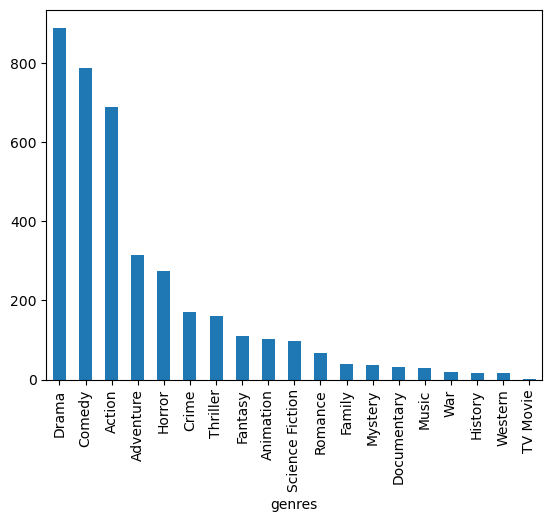

In [144]:
df['genres'].value_counts().plot(kind='bar')

In [145]:
# Which movie has the highest popularity score?
df[df['popularity'] == df['popularity'].max()]['original_title']

id
135397    Jurassic World
Name: original_title, dtype: object

In [146]:
# What is the average runtime of movies?  (min)
df['runtime'].mean()

109.22242408512847

### ✅ 2. Profitability Analysis

In [147]:
# Which movie had the highest revenue?
df[df['revenue'] == df['revenue'].max()]['original_title']

id
19995    Avatar
Name: original_title, dtype: object

In [148]:
# Top 10 Movies in term of revenue
df[['original_title', 'revenue']].sort_values(by='revenue', ascending=False)[:10]

,original_title,revenue
id,,
19995,Avatar,2781505847
140607,Star Wars: The Force Awakens,2068178225
597,Titanic,1845034188
24428,The Avengers,1519557910
135397,Jurassic World,1513528810
168259,Furious 7,1506249360
99861,Avengers: Age of Ultron,1405035767
12445,Harry Potter and the Deathly Hallows: Part 2,1327817822
109445,Frozen,1274219009


In [149]:
# Create profit column
df['profit'] = df['revenue'] - df['budget']
movies_profit_df = df.groupby('original_title', as_index=False)['profit'].sum().sort_values(by='profit', ascending=False)[:10]

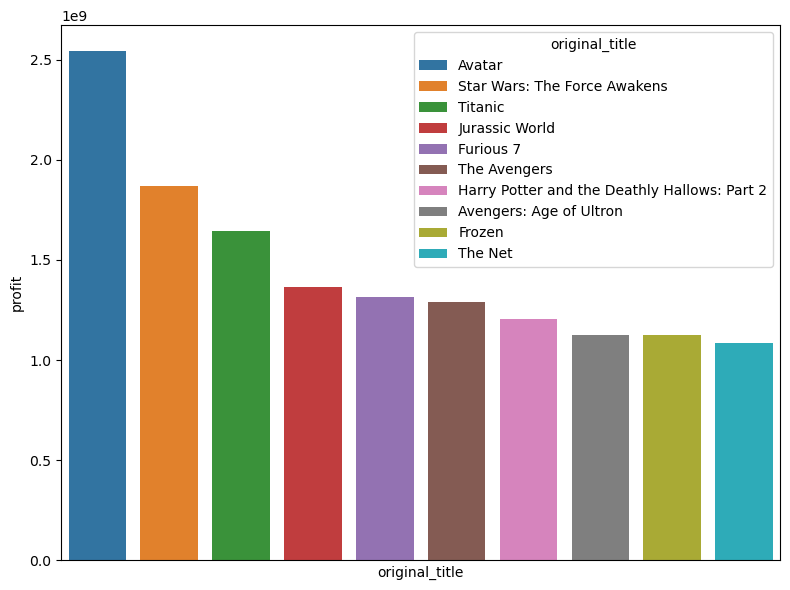

In [150]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.barplot(
    data=movies_profit_df,
    x='original_title',
    y='profit',
    hue='original_title',
    # width=0.9,
    dodge=False,
    ax=ax
)
plt.xticks([])  # plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [151]:
# Which movie had the highest budget?
df[df['budget'] == df['budget'].max()]['original_title']

id
46528    The Warrior's Way
Name: original_title, dtype: object

In [152]:
# Which movie had the highest ROI (Return on Investment)?
df['ROI'] = df['revenue'] - df['budget'] / df['budget']
df[df['ROI'] == df['ROI'].max()]['original_title']

id
19995    Avatar
Name: original_title, dtype: object

In [153]:
# Are high-budget movies always the most profitable?    --> Often
pd.set_option('display.float_format', '{:,.2f}'.format)
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ROI
popularity,1.00,0.45,0.62,0.22,0.78,0.32,0.17,0.40,0.55,0.60,0.62
budget,0.45,1.00,0.69,0.26,0.56,0.02,0.27,0.96,0.53,0.53,0.69
revenue,0.62,0.69,1.00,0.25,0.75,0.23,0.14,0.66,0.90,0.98,1.00
runtime,0.22,0.26,0.25,1.00,0.27,0.35,-0.11,0.33,0.28,0.22,0.25
vote_count,0.78,0.56,0.75,0.27,1.00,0.39,0.21,0.50,0.65,0.73,0.75
vote_average,0.32,0.02,0.23,0.35,0.39,1.00,-0.13,0.04,0.27,0.26,0.23
release_year,0.17,0.27,0.14,-0.11,0.21,-0.13,1.00,0.08,-0.10,0.09,0.14
budget_adj,0.40,0.96,0.66,0.33,0.50,0.04,0.08,1.00,0.57,0.50,0.66
revenue_adj,0.55,0.53,0.90,0.28,0.65,0.27,-0.10,0.57,1.00,0.91,0.90
profit,0.60,0.53,0.98,0.22,0.73,0.26,0.09,0.50,0.91,1.00,0.98


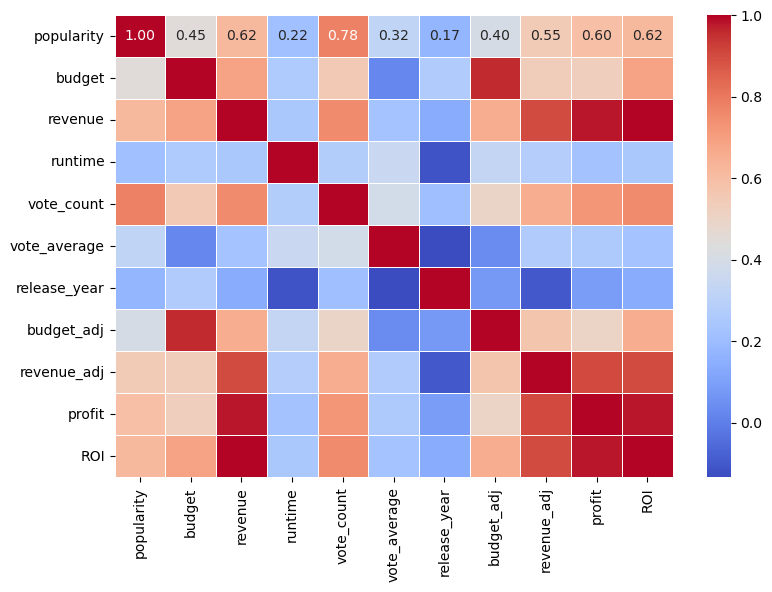

In [154]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.6,
            ax=ax)
# plt.tight_layout()
plt.show()

### ✅ 3. Trends Over Time

In [155]:
# How has the average budget changed over the years?
adv_yr = df.groupby('release_year')['budget'].mean()

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


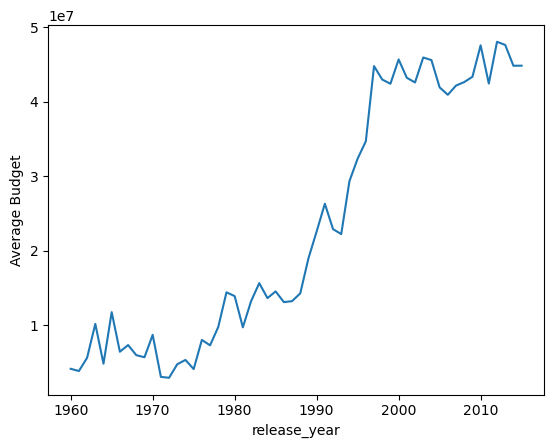

In [156]:
fig, ax = plt.subplots()
sns.lineplot(
  data=adv_yr,
  x=adv_yr.index,
  y=adv_yr.values,
  ax=ax
)
plt.ylabel('Average Budget')
plt.show()

In [157]:
# How has the average revenue changed over the years?
adv_rev = df.groupby('release_year')['revenue'].mean()

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


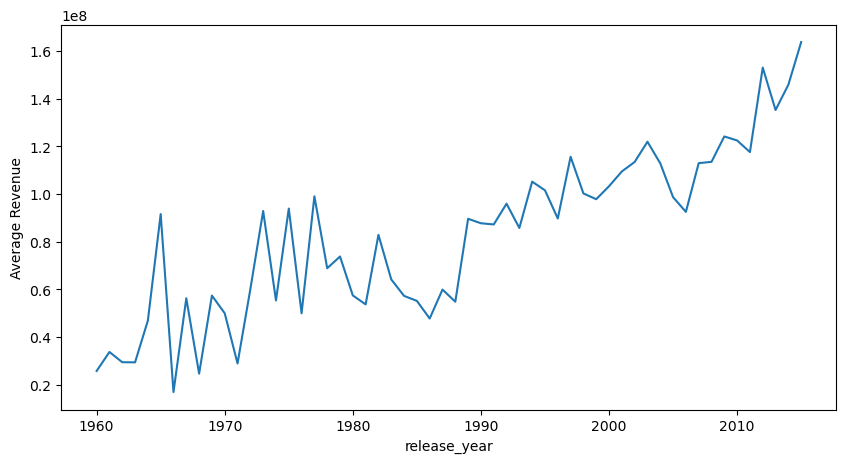

In [158]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(
  data=adv_rev,
  x=adv_rev.index,
  y=adv_rev.values,
  ax=ax
)
plt.ylabel('Average Revenue')
plt.show()

In [159]:
# Which year had the highest number of releases?      =2011 (199)
# df['release_year'].mode()
df['release_year'].value_counts().idxmax()

2011

In [160]:
# Has the popularity of movies increased over time?     ="Yes With Most Releases"
adv_pop = df.groupby('release_year')['popularity'].sum()

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


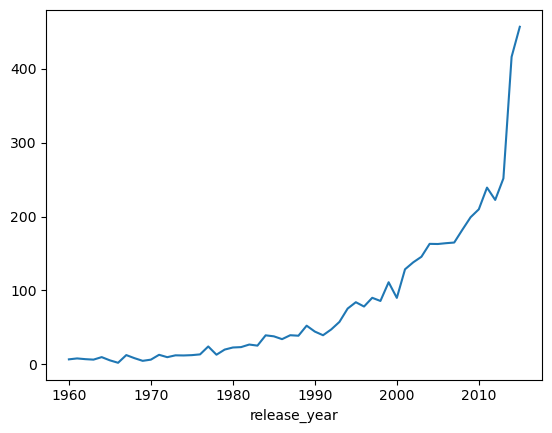

In [161]:
fig, ax = plt.subplots()
sns.lineplot(
  data=adv_pop,
  x=adv_pop.index,
  y=adv_pop.values
)
plt.show()

### ✅ 4. Popularity vs. Ratings

#### ▶️ Is there a correlation between popularity and vote average?     [="Yes About 32%"]

In [162]:
df[['popularity', 'vote_average']].corr()

,popularity,vote_average
popularity,1.00,0.32
vote_average,0.32,1.00


#### ▶️ Is there a correlation between budget and revenue?     [="Yes About 69%"]

In [163]:
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.00,0.69
revenue,0.69,1.00


#### ▶️ Do highly popular movies also have high ratings?      [="Yes there is a correlation of 78%"]

In [164]:
df[['popularity', 'vote_count']].corr()

,popularity,vote_count
popularity,1.00,0.78
vote_count,0.78,1.00


### ✅ 5. Genres & Performance

#### ▶️ Which genre has the highest number of movies?

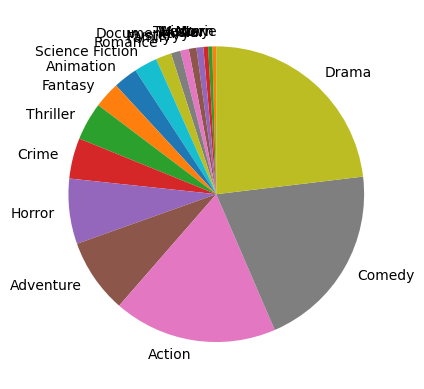

In [165]:
fig, ax = plt.subplots()
genres_df = df.groupby('genres').count()['original_title'].sort_values()
plt.pie(
  x=genres_df.values,
  labels=genres_df.index,
  startangle=90
)
plt.show()

#### ▶️ Which genre has the highest average revenue?

In [166]:
df[df['revenue'] == df['revenue'].max()]['genres']

id
19995    Action
Name: genres, dtype: object

#### ▶️ Which genre has the highest average vote rating?

In [167]:
df[df['vote_average'] == df['vote_average'].max()]['genres']

id
278            Drama
24128    Documentary
Name: genres, dtype: object

#### ▶️ Do action movies have higher budgets than dramas?

In [168]:
genres_budget = df.groupby('genres')['budget'].mean()
genres_budget = genres_budget.filter(regex='Action|Drama')
genres_budget['Action'] > genres_budget['Drama']

True

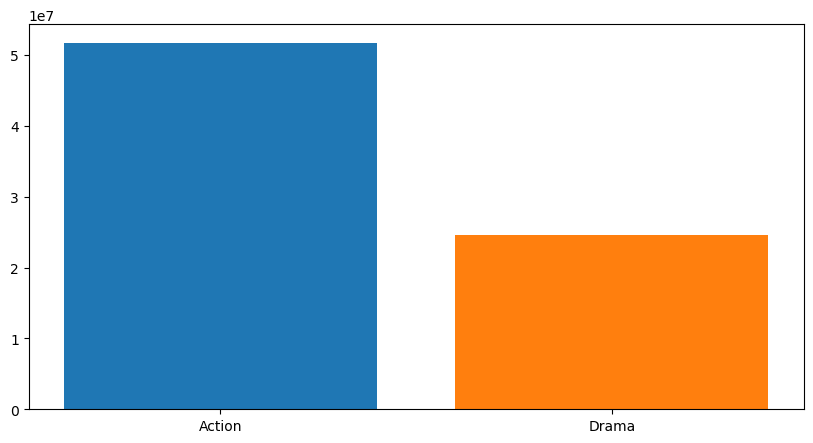

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(
  genres_budget.index,
  genres_budget.values,
  color=['C0', 'C1']
)
plt.show()

### ✅ 6. Cast & Directors


#### ▶️ Which director appears the most in the dataset?

In [170]:
df['cast'].info()   # Null values affect the process

<class 'pandas.core.series.Series'>
Index: 3853 entries, 135397 to 2161
Series name: cast
Non-Null Count  Dtype 
--------------  ----- 
3849 non-null   object
dtypes: object(1)
memory usage: 189.2+ KB


In [171]:
actors = df['cast'].dropna()
actors = '|'.join(actors)
actors = [str.strip(actor) for actor in actors.split('|')]
pd.Series(actors).value_counts().idxmax()

'Robert De Niro'

#### ▶️ Which director has the highest average revenue for their movies?

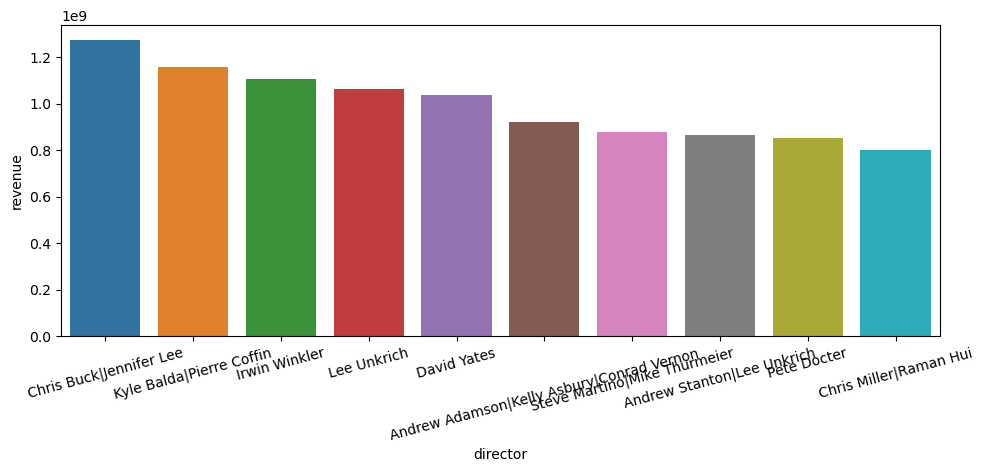

In [172]:
director_plot_df = pd.DataFrame(df.groupby('director')['revenue'].mean().sort_values(ascending=False)).head(10)
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
  data=director_plot_df,
  x=director_plot_df.index,
  y='revenue',
  ax=ax
)
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

In [173]:
df.groupby('director')['revenue'].mean().idxmax()

'Chris Buck|Jennifer Lee'

#### 😥❌ But some rows contains multiple directors 🤔

In [174]:
# Split directors lists in each row
director_df = df[['director', 'revenue']].dropna().sort_values(by='revenue', ascending=False)
director_df['director'] = df['director'].str.split('|')
director_df

,director,revenue
id,,
19995,[James Cameron],2781505847
140607,[J.J. Abrams],2068178225
597,[James Cameron],1845034188
24428,[Joss Whedon],1519557910
135397,[Colin Trevorrow],1513528810
...,...,...
9431,[Gilbert Adler],5
24914,[Shinichiro Watanabe],5
14301,[Joss Whedon],3


In [175]:
# Create a new dataframe that contains each individual's revenue.
new_director_df = pd.DataFrame(columns=('director', 'revenue'))
for row in director_df.values:
  for director in row[0]:
    new_director_df.loc[len(new_director_df)] = (str.strip(director), row[1])
new_director_df

,director,revenue
0,James Cameron,2781505847
1,J.J. Abrams,2068178225
2,James Cameron,1845034188
3,Joss Whedon,1519557910
4,Colin Trevorrow,1513528810
...,...,...
4158,Gilbert Adler,5
4159,Shinichiro Watanabe,5
4160,Joss Whedon,3
4161,Kevin Smith,2


In [176]:
new_director_df.groupby('director')['revenue'].mean().idxmax()

'Jennifer Lee'

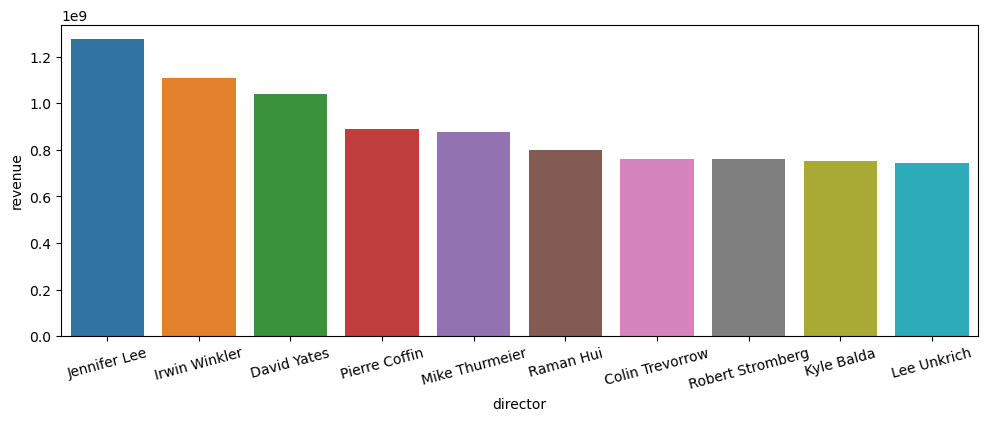

In [177]:
director_group_df = new_director_df.groupby('director', as_index=False)['revenue'].mean()
director_group_df = director_group_df.sort_values(by='revenue', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
  data=director_group_df,
  x="director",
  y="revenue",
  ax=ax
)
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

#### ▶️ Which movies have the largest cast size?


#### Method1

In [178]:
df['cast_count'] = df['cast'].dropna().str.split('|').apply(lambda x: len(x))
max_len = df['cast_count'].max()
max_cast = df.loc[df['cast_count'] == max_len, 'original_title']
max_cast

id
135397                     Jurassic World
76341                  Mad Max: Fury Road
262500                          Insurgent
140607       Star Wars: The Force Awakens
168259                          Furious 7
                       ...               
396       Who's Afraid of Virginia Woolf?
5780                         Torn Curtain
6644                            El Dorado
5923                     The Sand Pebbles
2161                     Fantastic Voyage
Name: original_title, Length: 3815, dtype: object

#### Method2

In [179]:
splited_cast_df = df['cast'].dropna().str.split('|')
max_len = max([len(item) for item in splited_cast_df])    # max_len = [len(item) for item in splited_cast_df]
max_cast = splited_cast_df[splited_cast_df.str.len() == max_len]
df.loc[max_cast.index, 'original_title']

id
135397                     Jurassic World
76341                  Mad Max: Fury Road
262500                          Insurgent
140607       Star Wars: The Force Awakens
168259                          Furious 7
                       ...               
396       Who's Afraid of Virginia Woolf?
5780                         Torn Curtain
6644                            El Dorado
5923                     The Sand Pebbles
2161                     Fantastic Voyage
Name: original_title, Length: 3815, dtype: object

### ✅ 7. Runtime & Performance
#### ▶️ Does movie length affect popularity or ratings?

In [180]:
df[['runtime', 'popularity', 'vote_average']].corr()

,runtime,popularity,vote_average
runtime,1.00,0.22,0.35
popularity,0.22,1.00,0.32
vote_average,0.35,0.32,1.00


#### ▶️ What is the average runtime per genre?

In [181]:
df.groupby('genres')['runtime'].mean()

genres
Action            110.48
Adventure         114.80
Animation          90.13
Comedy            102.14
Crime             114.85
Documentary       101.97
Drama             117.65
Family             93.47
Fantasy           104.52
History           129.29
Horror             97.77
Music             107.97
Mystery           106.61
Romance           107.64
Science Fiction   110.52
TV Movie           89.00
Thriller          110.27
War               128.10
Western           121.94
Name: runtime, dtype: float64

#### ▶️ How is the average runtime over the years?

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


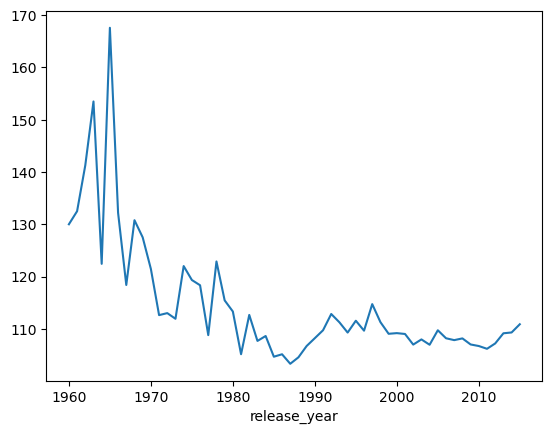

In [182]:
runtime_df = df.groupby('release_year')['runtime'].mean()
fig, ax = plt.subplots()
sns.lineplot(
  data=runtime_df,
  x=runtime_df.index,
  y=runtime_df.values
)
plt.show()

### ✅ 8. Budget vs Revenue Adjustment
#### ▶️ How do budget_adj and revenue_adj compare to original values?

In [183]:
df[['budget', 'budget_adj']].corr()

,budget,budget_adj
budget,1.00,0.96
budget_adj,0.96,1.00


#### ▶️ Which year had the biggest adjustment difference?

In [184]:
df['diff_budget'] = abs(df['budget'] - df['budget_adj'])
df[df['diff_budget'] == df['diff_budget'].max()]['release_year']

id
8095    1963
Name: release_year, dtype: int64

In [185]:
df['diff_revenue'] = abs(df['revenue'] - df['revenue_adj'])
df.loc[df['diff_revenue'].idxmax(), 'release_year']

1977

#### ▶️ Plot (Budget / Revenue)

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

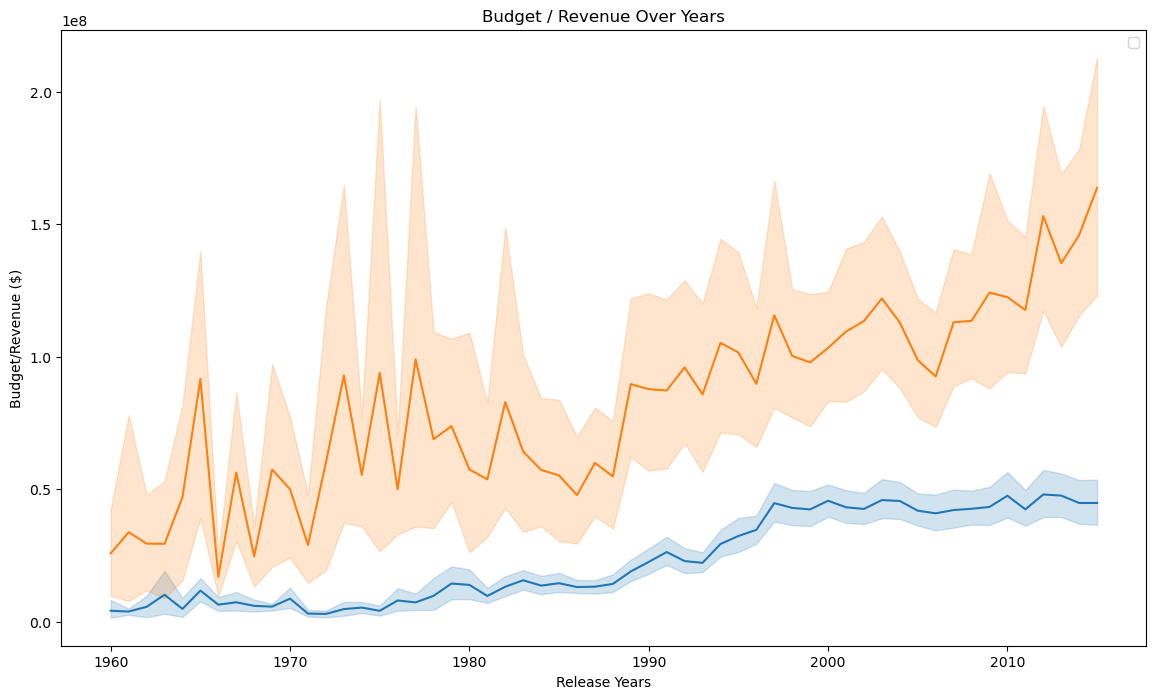

In [186]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(
  data=df,
  x='release_year',
  y='budget',
  ax=ax
)
sns.lineplot(
  data=df,
  x='release_year',
  y='revenue',
  ax=ax
)
plt.title('Budget / Revenue Over Years')
plt.xlabel('Release Years')
plt.ylabel('Budget/Revenue ($)')
plt.legend()
plt.show()

# 😁💪 Quick Conclusions
* Drama is the most popular genre, following by comedy, action and adventure.
* 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
* The budget and revenue are closely connected.
* The maximum number of movies was released in 2011.
* Average runtime of the movies has decreased over the years.
* Jennifer Lee has the highest average revenue for her movies?
* A corresponding increase in revenues has been observed for movies with higher budgets.